# A gentle introduction to neuroscience and task f-MRI study

Neuroscience is a multidisciplinary science to study the human brain, and MRI is one of the main and widely used tool for measuring the brain.
f-MRI itself focuses on the identification of patterns evoked by tasks performed during MRI scanning.
The goal of this post is to give you a simple and broad overview of how f-MRI studies are conducted.

<binder></binder>

## tl;dr
1. A f-MRI signal approximates a measure of the brain activity through the HRF.
2. Task design connects activity measurement and real-world stimuli.
3. Analysis can be done using standard GLM with statistical tools and/or ML.

## 1. Magnetic Resonance Imaging

Magnetic Resonance Imaging (MRI) uses radio wave frequency (RF) in the presence of a strong magnetic field (usually 3T) to produce detailed images from any part of the body.
The emitted RF signal cause the water molecules in our body to resonate, and the signal is altered at different frequencies so different slices of the body resonate.
After this operation, it is the strength of the received RF signal from the different body slices that makes the MRI pixel intensity.
Check also that [nice little clip](https://www.youtube.com/watch?v=nFkBhUYynUw) if you want a graphical explanation.

MRI does not emit ionizing radiation like CT-scan, but there are several risks associated like use of contrast agents <cite>shellock2008mri1</cite>,
the powerfull magnetic field attracting magnetic objects, or noise inside the machine <cite>shellock2008mri2</cite>.

In 2003, Paul Lauterbur and Peter Mansfield were awarded the Nobel Prize in Physiology or Medicine for their contributions to the development of Magnetic Resonance Imaging (MRI).

## 1.1 Anatomical MRI

Anatomical or structural image is the most common neuroimaging data that uses MRI techniques.
It is simply a 3D volume of the cerebrum that can be viewed either as multiple slices, or by its surface.

<img src="imgs/fmri_intro/3d_view.jpg" alt="3d_view" style="width: 500px;"/>

The tissues emits a more or less intense signal, and MRI is more sensitive than CT scans for distinguishing soft tissues.
This property makes MRI a good candidate for brain imaging, to study its shape, volume, and developmental changes.
Example studies include brain tumor segmentation <cite>wadhwa2019review</cite> or even investigating COVID-19 patients chests <cite>vasilev2021chest</cite> (by the way the [best detection method for COVID-19]({% post_url 2000-01-01-false_positive %})).

It is also possible to modify the contrast of the image (and hence highliting specific tissues of the brain), by gauging the relaxation time of the MRI signal.
Different relaxation times enable multiple pulse sequences: T1-weighted image (the most basic, white matter is lighter), T2-weighted (cerebrospinal fluid darker) and FLAIR (similiar to T2w but with CSF darker).

## 1.2 Functionnal MRI

Functionnal MRI is an approximated measure of the brain activity.

When activity occurs in the brain, neurons fires and consumes energy through oxygen.
After this short-term consumption (called the initial dip), the brain slowly over-compensate the demand of oxygen to a much higher number than the consumption.
This is what is refered as Blood-oxygen-level-dependent (BOLD) signal, and serves as the canonical response to model the activity of the brain (haemodynamic response function or HRF).
<img src="imgs/fmri_intro/bold.jpg" alt="3d_view" style="width: 500px;"/>

The relationship between electrical activity and the BOLD signal is complex and still remains a debate among researchers <cite> logothetis2004interpreting </cite>.

In practice, f-MRI is simply the acquisition of multiple low-resolution and fast MRI images (echo planar or EPI) through time, where each voxel intensity represent the ativity.
Usually, a participant is asked to performs some tasks while being scanned, and the idea is to try to correlate these tasks with the f-MRI signal.
Because BOLD signal acquisition is really slow (few seconds), it is important to design appropriate tasks <cite> amaro2006study </cite>.

There are obviously lot of others imaging technics derived from MRI, but those are not the goal of this post.

## 2. Functionnal MRI study

Designing a task f-MRI study requires a lot of time and expertises.
One of the first important step when manipulating clinical data is to standardize its structure and make it usable.
It is only then that you can create a statisctial model and start analysing the results.

## 2.1 Common neuro-imaging data structure

f-MRI data is collected by the scanner, and sequences are controlled via a computer in another room (what is called the console).
It is then converted from a raw binary fromat to the Digital Imaging and Communications in Medicine (DICOM) format, the standard for medical imaging.
Anonymization (removing all participant naming information, and de-facing procedure) is usually perfomed at this stage.

More recently, a consensus was proposed on the organization of data for neuroimaging experiments: the Brain Imaging Data Structure (BIDS) <cite> gorgolewski2016brain </cite>.
It is now widely used in the neuroscience community.

## 2.2 Data pre-processing and QC

The f-MRI data content itself is still not usable as is for neuroscience studies. Even if it is in BIDS format (which is just a way of re-organizing files), the data needs to be prepared.
Such preparation involves registration (linear motion and non-linear warp estimation), filtering (de-noising, confounds removal) and segmentation (brain parts, skull stripping).
Each pre-processing step is critical, for example you need to aligned each EPI scan so they are in the same reference space (usually MNI152 <cite> fonov2011unbiased </cite>).
There are lot of pre-processing tools available for the community, but the most widely used is fMRIPrep <cite> esteban2019fmriprep </cite>.

After pre-processing, it is essential to perform a quality control on your data.
It usually involve an interactive software where the researchers can either label the current data as "pass", "fail" or "maybe".
QC is also itself a whole area of research but not the goal of this post.

## 2.3 fMRI Analysis

The analysis of any preprocessed fMRI can be decomposed into multiple steps: task definition/design, modeling and statistical information extraction.
Modeling is usually performed using a general linear model (GLM), and the resulting coefficient can be incorporated into a standard statistical test procedure.

## 2.3.1 GLM model


The [GLM](https://en.wikipedia.org/wiki/General_linear_model) is just the general case of the multiple linear regression (MLR) model.
Whereas MLR depends on one $n\text{-}D$ dependent variable $X$, the GLM is expressed with $i=0...p$ independent variables (or regressors) $X_{ij}$.

For one specific sample $j$ , the time signal $Y_j$:

$$
\begin{equation}
    Y_j = \beta_{0j} X_{0} + \beta_{1j} X_{1} + ... + \beta_{pj} X_{p} + \epsilon_j
\end{equation}
$$

Some of the regressors $X_{i}$ can be derived from the task design, and this is what we will see during the hands-on.
Basically, knowing the time of each event (for example, the patient move its hand at $t=2.3$ sec), one can convolve these with the HRF to design the expected measurement.
The other (nuisance) regressors are called confounds and are either included into the GLM, or filtered out during the pre-processing (there is no strong scientific consensus on which method to employ <cite>lindquist2019modular</cite>).

What is of interrest here is the what so called beta-maps $\beta_{ij}$ (estimated coefficients), which are simply the "amount" of activation for a voxel $j$ and one specific stimuli $i$.

A last note is that the input fMRI data is a 4D tensor of shape $(x \times y \times z \times t)$.
The "trick" to express $Y$ into a GLM is to mask the data so it has a shape of $(n \times t)$, where each line of the matrix is a specific voxel.
To reduce the data burden and smooth-out the data, it is also standard to use a common functional brain segmentation map (or parcelations) with different resolution <cite> bellec2010multi </cite>.

There exists a second level of analysis called group-analysis.
We will not talk about that here but it basically involve using the beta-maps as measurements, and extract voxel-wise relative importance of factors such as age, disease etc...

## 2.3.2 Statistical tests

Once the GLM is defined and beta-maps estimated, one can use statistical tests to explain the parameters.
The standard **null hypothesis** is that there is **no activation related to a given regressor**.

One popular test is the [F-test](https://en.wikipedia.org/wiki/F-test) that describes how your betas (multiplied by the regressor) explains well the input signal.
Another, the student test (t-test, or [z-test](https://en.wikipedia.org/wiki/Z-test) for more samples), can be used to compare one task versus another.
For example in the next section, we will consider voxels in the brain where an audio task has more effect than a visual task.
Such inequalities $\beta_1 > \beta_2$ can be designed using a [contrast](https://en.wikipedia.org/wiki/Contrast_(statistics).

Check [this pdf](https://www.fmrib.ox.ac.uk/primers/appendices/glm.pdf) for more information on the statistical tests.

## 3. Hands on

Finally the hands-on!
Sorry for the long introduction but there were so many things to discuss before this...

This pythonic hands-on will focus on finding which brain regions are activated under specific stimulis (i.e. tasks that a participant perform while being scanned).

Hopefully, we will not need to build everything from scratch because there exist a python package.
It is called [Nilearn](https://nilearn.github.io/), and it aims to help neuroscientist build their machine learning project.
The neuroscience community is indeed really active to provide open source tools,
and some of them even reached a bigger audience like [ANTs](http://stnava.github.io/ANTs/) or [Datalad](http://handbook.datalad.org/en/latest/).

In [1]:
### imports

import warnings
warnings.filterwarnings("ignore")
import IPython.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nilearn
import nilearn.datasets
import nilearn.glm
import nilearn.plotting

## 3.1 Input data

For this tutorial, we will use a little and open fMRI dataset: a subset of the Functional Localizer dataset.
This simple protocol captures the cerebral bases of auditory and visual perception, motor actions, reading, language comprehension and mental calculation at an individual level.
It can be [accessible online](https://osf.io/vhtf6/), but we will fetch it from Nilearn instead.

>**Note**:  
>The fMRI data from the [Nilearn fetcher](http://nilearn.github.io/modules/generated/nilearn.datasets.fetch_localizer_first_level.html) is already pre-processed and ready for analysis.  
>This is usually not the case for the raw data in BIDS, but using non-preprocessed data in the case of a strict GLM study should not harm too much (but not recomended!).

In [2]:
# localizer dataset download
data = nilearn.datasets.fetch_localizer_first_level()

Looking at the fMRI data (in [NIfTI](https://nifti.nimh.nih.gov/) format), it is a $4D$ `numpy` array.
There is just one participant on which were acquired $128$ EPI images of size $(53, 63, 46)$.

In [3]:
# checking fMRI input data

func_image = data['epi_img']
func_image_data = nilearn.image.load_img(func_image)
func_image_data.shape

(53, 63, 46, 128)

And here is how one sample (or voxel) of fMRI signal looks like:

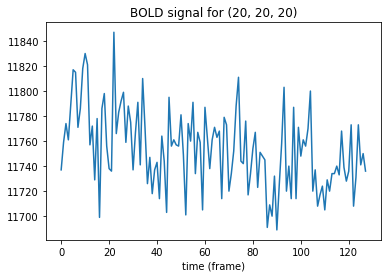

In [4]:
### plot one voxel data

plt.figure()
plt.plot(func_image_data.get_fdata()[20, 20, 20, :])
plt.title("BOLD signal for (20, 20, 20)")
plt.xlabel("time (frame)")
plt.show()

As you can see, fMRI data is really noisy!

>**Note**:  
>The raw time unit for neuroinformatic is often in frames (one EPI image is one frame), and not in seconds.

Here, we will focus on auditory and visual stimulis.
Let's check some examples of what the participant is hearing or seeing (stimulis and protocol can be downloaded [here](https://www.neurospin-wiki.org/pmwiki/Main/StandardLocalizers?action=download&upname=Localizer_English.zip))!

In [5]:
# "display" audio
IPython.display.Audio("../data/fmri_intro/audio_example.wav")

"*On raconte des histoires de fantômes.*" Really!?

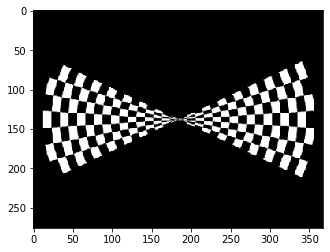

In [6]:
### visual example

visual_example = plt.imread("../data/fmri_intro/visual_example.png")
plt.figure()
plt.imshow(visual_example, cmap="gray")
plt.show()

*Imagine being scanned and looking at weird stuff like this during hours... Yes, this is common in neuroimaging studies!*

## 3.2 GLM modeling

The first step is to load the behavioral (or event) file.
It contains all the condition/label (`trial_type`), start time (`onset`) and duration (`duration`) in seconds.
There should be obviously one event file per fMRI run, and in our case there is just one.

In [7]:
# Load data labels

event_file = data['events']
events = pd.read_csv(event_file, sep='\t')
events

,trial_type,onset,duration
0,visual_computation,0.000000,1.0
1,visual_computation,2.400000,1.0
2,horizontal_checkerboard,8.700000,1.0
3,audio_right_hand_button_press,11.400000,1.0
4,sentence_listening,15.000000,1.0
...,...,...,...
75,sentence_listening,284.399994,1.0
76,sentence_reading,288.000000,1.0
77,visual_right_hand_button_press,291.000000,1.0
78,sentence_listening,293.399994,1.0


>**Note**:  
>Sometimes the event file(s) is not a `tsv` file or it does not contain the necessary columns.
>If that is the case there is no choice to build a new one.


To design the GLM model, we will need the repetition time $TR$ of the acquisition (which is the time between two $3D$ EPI scans).
It should be accessible in [the dataset metadata](https://www.neurospin-wiki.org/pmwiki/Main/StandardLocalizers) and for that dataset it is $2.4$ sec.

The GLM will also include a cosine drift model so it can catch slow oscilating data (like heart rate or breathing), with a cut-off frequency of $0.01$ Hz.

In [8]:
# GLM design and fit

TR = 2.4
fmri_glm = nilearn.glm.first_level.FirstLevelModel(t_r=TR, high_pass=.01)
fmri_glm = fmri_glm.fit(func_image, events=events)

Let's check how the GLM looks like!

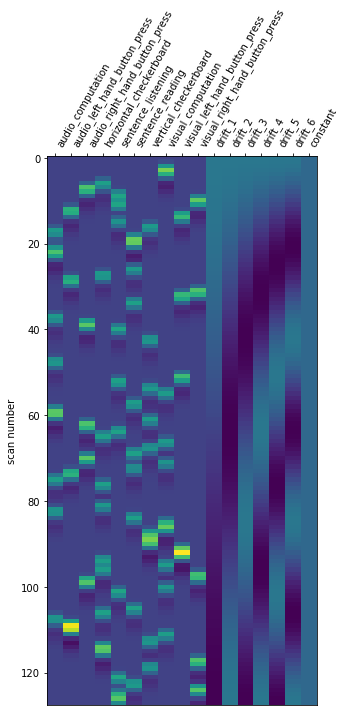

In [9]:
### GLM plot

design_matrix = fmri_glm.design_matrices_[0]
nilearn.plotting.plot_design_matrix(design_matrix)
plt.show()

If we take a deeper look at some regressor, we clearly see how the HRF canonical function was convolved with the events.

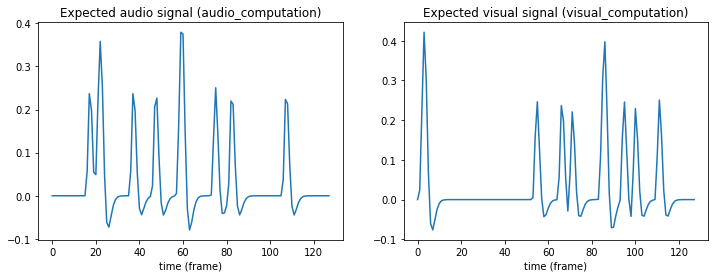

In [10]:
### plot some regressors

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(fmri_glm.design_matrices_[0]['audio_computation'].to_numpy())
axes[0].set_xlabel("time (frame)")
axes[0].set_title("Expected audio signal (audio_computation)")
axes[1].plot(fmri_glm.design_matrices_[0]['visual_computation'].to_numpy())
axes[1].set_xlabel("time (frame)")
axes[1].set_title("Expected visual signal (visual_computation)")
plt.show()

## 3.3 Brain activation of audio VS visual

Now that the GLM model was defined, we can estimate the brain activation.
To do so, we will first define the appropriate [contrast](https://en.wikipedia.org/wiki/Contrast_(statistics) and later perform a [z-test](https://en.wikipedia.org/wiki/Z-test).

Because we want to check the activation of an audio task versus a visual task, the contrast can be defined by the substraction of the two conditions.

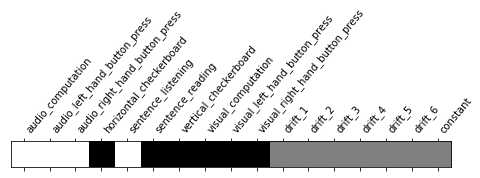

In [11]:
### contrast definition

conditions = events['trial_type'].values
contrasts_audio = (
    np.array(design_matrix.columns == "audio_left_hand_button_press"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "audio_right_hand_button_press"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "audio_computation"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "sentence_listening"
      , dtype=np.float32))
contrasts_visual = (
    np.array(design_matrix.columns == "horizontal_checkerboard"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "vertical_checkerboard"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "visual_left_hand_button_press"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "visual_right_hand_button_press"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "visual_computation"
      , dtype=np.float32)
    + np.array(design_matrix.columns == "sentence_reading"
      , dtype=np.float32))
contrast_def = contrasts_audio - contrasts_visual
nilearn.plotting.plot_contrast_matrix(contrast_def, design_matrix=design_matrix)
plt.show()

The last step consist in performing a z-test using the previously defined contrast definition, we will use a p-value of $0.05$.


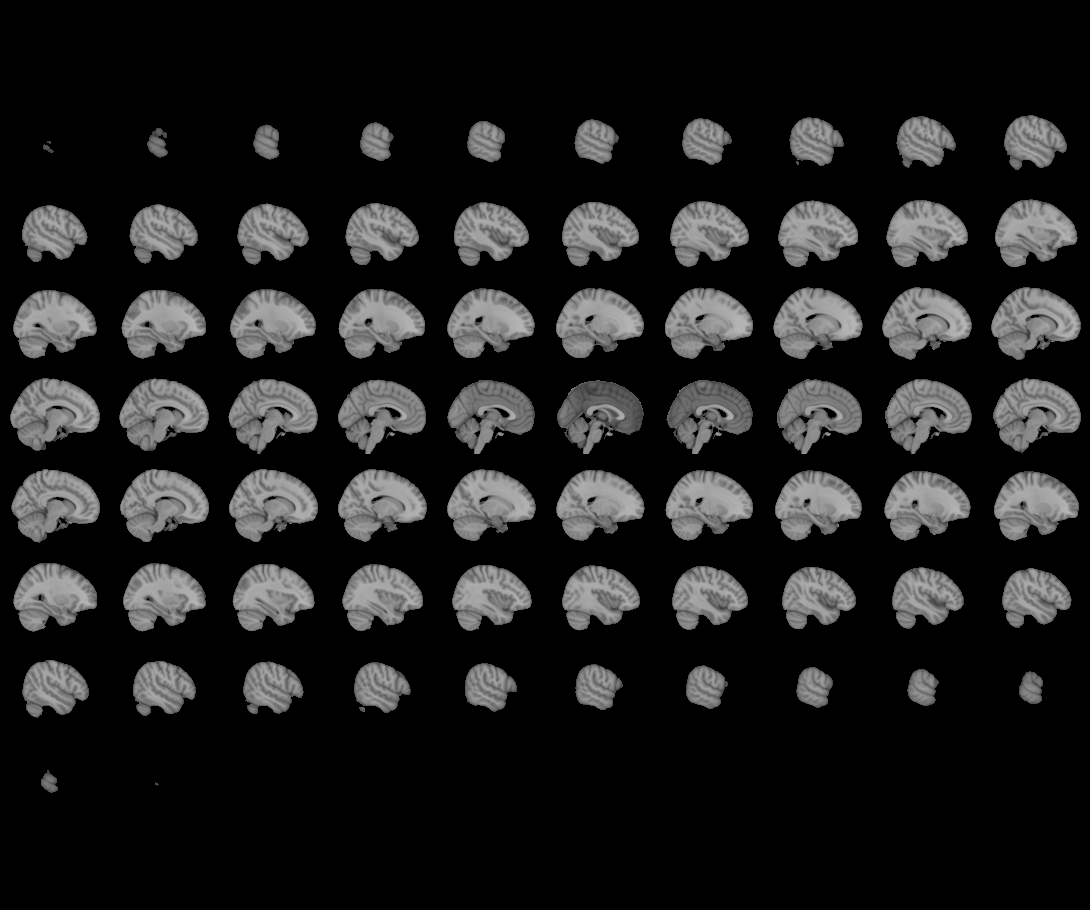
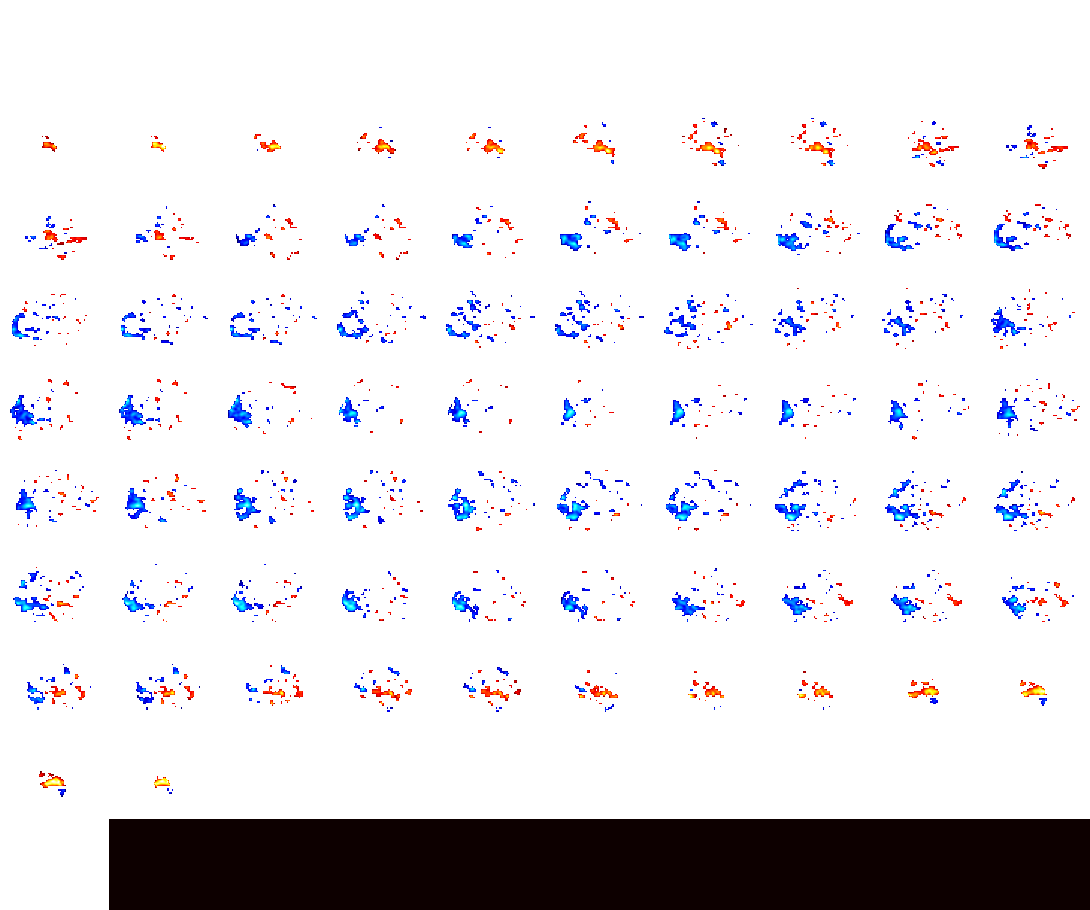

In [12]:
# estimate contrast
z_map = fmri_glm.compute_contrast(contrast_def, output_type='z_score')
_, threshold = nilearn.glm.threshold_stats_img(z_map, alpha=.05)

# plot
nilearn.plotting.view_img(z_map, threshold=threshold, black_bg=True, title="audio vs visual (p<0.001)")

The results are pretty good!
There is a high activation in the auditory cortex (Brodmann areas 41, 42, 22) and visual cortex (Brodmann area 17) as expected.

In case you want to see all the plots with just one command, you should definitively check [`nilearn.reporting.make_glm_report`](https://nilearn.github.io/modules/generated/nilearn.reporting.make_glm_report.html).

## Conclusion

This post gave an overview on what is a neuroimaging study.
As you saw, there are a lot (lot) of different steps involved, and each require a specific expertise (from hardware to software).
A good exercice is to try a second level study!

## To go further

You want to check the [fsl tutorials](https://www.youtube.com/watch?v=3ExL6J4BIeo&list=PLvgasosJnUVl_bt8VbERUyCLU93OG31h_&index=1).
They explain all steps involved in a neuroimaging study, it helped me a lot understanding first and second level analysis for example.
Check also this really nice [MIT fMRI Bootcamp](https://www.youtube.com/watch?v=yA65FuSpOMs&list=PLyGKBDfnk-iDVpUGSR_GlDmQrZOS0Lk6k) from Rebecca Saxe.

If you want to apply machine learning to neuroscience, you should definitievly look at 
[this live tutorial](https://binder-mcgill.conp.cloud/v2/gh/neurolibre/introML-book/master?filepath=content%2F01%2FMAIN_tutorial_machine_learning_with_nilearn.ipynb).
Also one of my favourite paper in neuroscience, a benchmarking of different ML predictive models <cite>dadi2019benchmarking</cite>.

Among my professionnal work, I have been working in the [cneuromod project](https://www.cneuromod.ca/) team.
This project aims to train ANNs using extensive experimental data on individual human brain activity and behaviour.
As part of this project, I was even able to be the first one playing Super Mario Bros. inside a MRI scanner!

## Acknowledgement

This work was inspired from [this initial tutorial](https://nilearn.github.io/auto_examples/plot_single_subject_single_run.html).

## Tags

Data-Science; Health-Care; Open-Science; Statistics